In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("netflix_titles.csv")
df=pd.DataFrame(data)
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df[["director","cast","country"]]=df[["director","cast","country"]].replace(np.nan,"unknown")
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [7]:
md=df["rating"].mode()
df["rating"]=df["rating"].fillna(md)
df=df.dropna()
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(8790, 12)

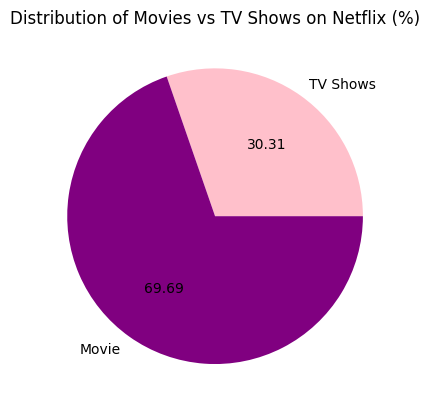

In [10]:
count_of_tvshows=(df["type"]=="TV Show").sum()
count_of_movie=(df["type"]=="Movie").sum()
count_percent_tv=np.multiply((np.divide(count_of_tvshows,8790)),100)
count_percent_movie=np.multiply((np.divide(count_of_movie,8790)),100)

l=[count_of_tvshows,count_of_movie]
leg=["TV Shows","Movie"]

plt.pie(x=l,labels=leg,autopct="%.2f",colors=["pink","purple"])
plt.title("Distribution of Movies vs TV Shows on Netflix (%)")
plt.show()

Text(0.5, 1.0, 'Year-wise Trend of Movies and TV Shows on Netflix')

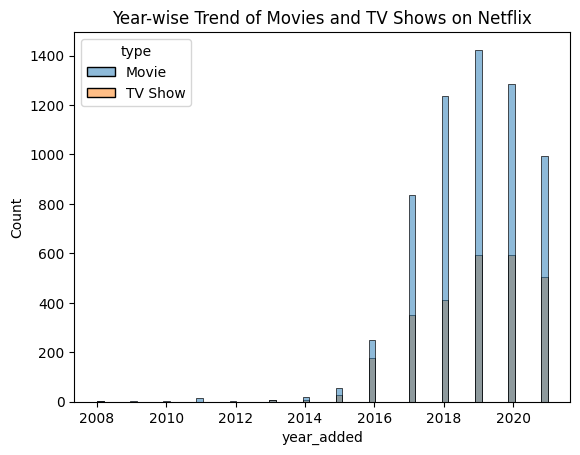

In [11]:
df["date_added"] = df["date_added"].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df["year_added"] = df["year_added"].astype(int)
sns.histplot(data=df,x="year_added",hue="type")
plt.title("Year-wise Trend of Movies and TV Shows on Netflix")

Text(0.5, 1.0, 'Year with Maximum Content Added on Netflix')

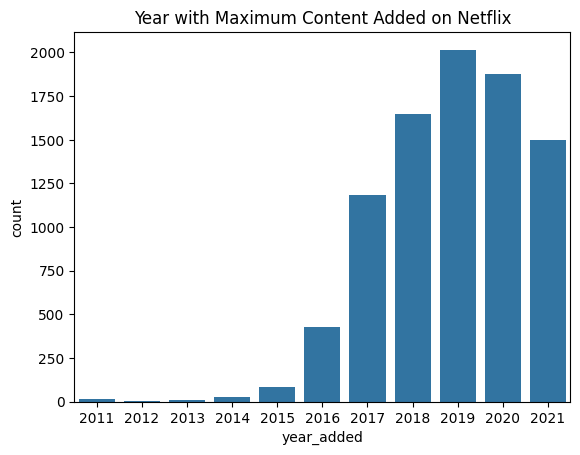

In [12]:
filter=df[df['year_added']>2010]
sns.countplot(data=filter,x="year_added")
plt.title("Year with Maximum Content Added on Netflix")

<Axes: title={'center': 'Top 5 Countries by Netflix Titles'}, xlabel='country', ylabel='title_count'>

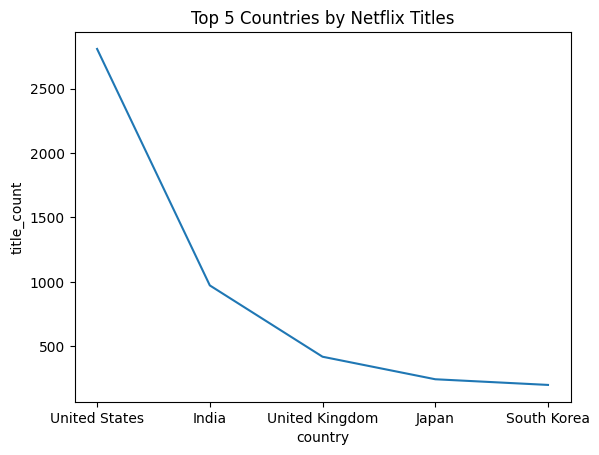

In [13]:
filtered_df = df[df["country"].notna() & (df["country"].str.strip() != "unknown")]
grp=filtered_df.groupby("country")["title"].count().reset_index()
grp.columns=["country","title_count"]
top5=grp.sort_values(by="title_count",ascending=False).head(5)
plt.title("Top 5 Countries by Netflix Titles")
sns.lineplot(data=top5,x="country",y="title_count")

   year_added  type
0        2016    10
1        2017   142
2        2018   333
3        2019   203
4        2020   189
5        2021    95


<Axes: title={'center': 'Netflix Content Added in India Over the Years'}, xlabel='year_added', ylabel='type'>

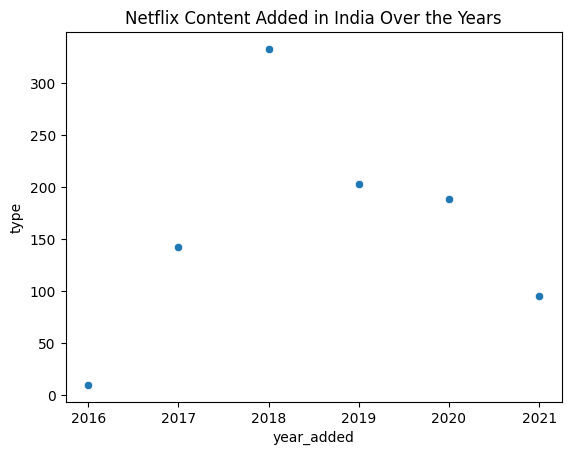

In [14]:
contry=df[df["country"]=="India"]
grp1=contry.groupby("year_added")["type"].count().reset_index()
grp1.columns=["year_added","type"]
print(grp1)
plt.title("Netflix Content Added in India Over the Years")
sns.scatterplot(data=grp1,x="year_added",y="type")

<Axes: xlabel='rating', ylabel='count'>

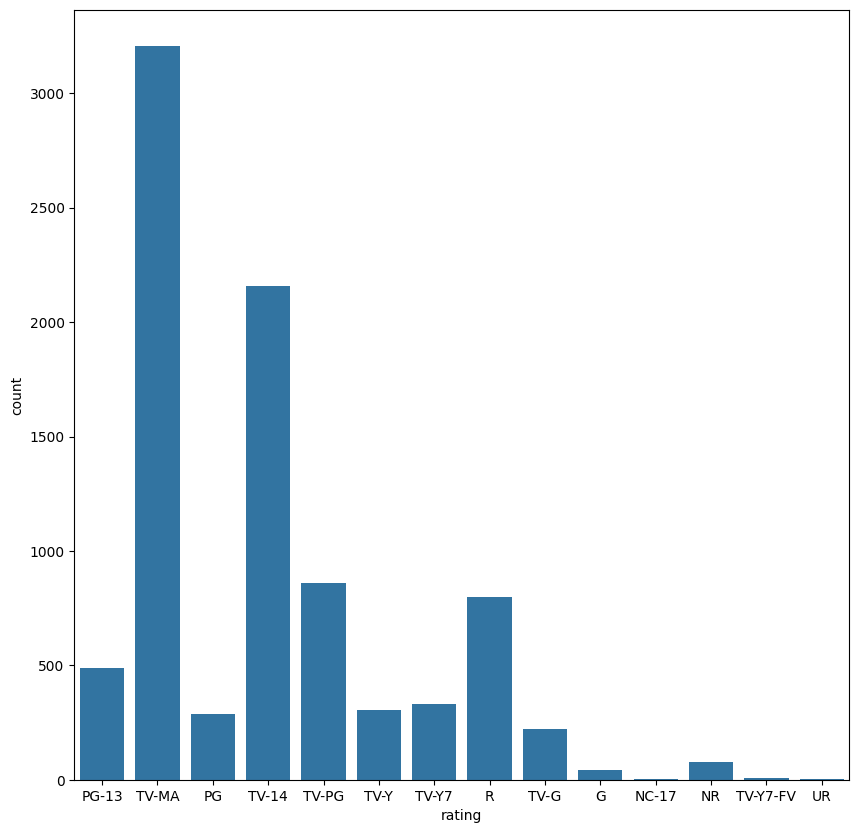

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="rating")

In [16]:
fil=df[df["type"]=="Movie"]
shortest=fil.sort_values(by="duration",ascending=True).head(1)
longest=fil.sort_values(by="duration",ascending=False).head(1)
print(f"{shortest['title'].values[0]} = {shortest['duration'].values[0]}")
print(f"{longest['title'].values[0]} = {longest['duration'].values[0]}")

American Factory: A Conversation with the Obamas = 10 min
U-Turn = 99 min


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VATSAL PARIKH\AppData\Local\Temp\ipykernel_14512\1996213403.py:8: SyntaxWarning: invalid escape sequence '\d'
  fil["season_count"] = fil["duration"].str.extract("(\d+)").astype(float)
C:\Users\VATSAL PARIKH\AppData\Local\Temp\ipykernel_14512\1996213403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil["date_added"] = fil["date_added"].astype(str).str.strip()
C:\Users\VATSAL PARIKH\AppData\Local\Temp\ipykernel_14512\1996213403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

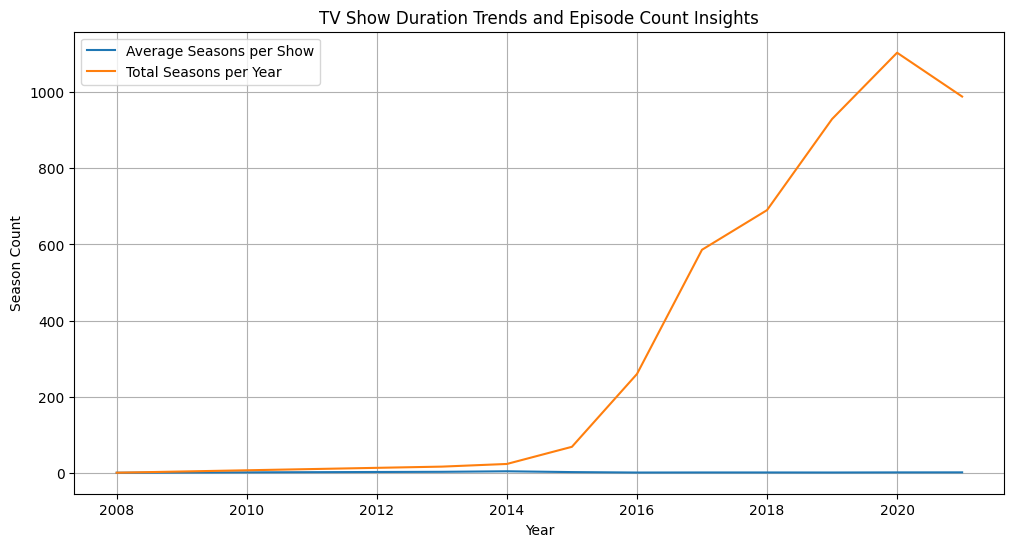

In [17]:
fil=df[df["type"]=="TV Show"]
fil["date_added"] = fil["date_added"].astype(str).str.strip()
fil['date_added'] = pd.to_datetime(fil['date_added'], errors='coerce')
fil['year_added'] = fil['date_added'].dt.year
fil["year_added"] = fil["year_added"].astype(int)

# Extract numeric value from "duration" like "3 Seasons"
fil["season_count"] = fil["duration"].str.extract("(\d+)").astype(float)

grp=fil.groupby("year_added")["season_count"].agg(["mean","sum"]).reset_index()
grp.columns=["year","avg_seasons",'total_seasons']

plt.figure(figsize=(12, 6))

sns.lineplot(data=grp, x="year", y="avg_seasons", label="Average Seasons per Show")
sns.lineplot(data=grp, x="year", y="total_seasons", label="Total Seasons per Year")

plt.title("TV Show Duration Trends and Episode Count Insights")
plt.xlabel("Year")
plt.ylabel("Season Count")
plt.legend()
plt.grid(True)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'International\nMovies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International\nTV\nShows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action\n&\nAdventure'),
  Text(6, 0, 'TV\nDramas'),
  Text(7, 0, 'Independent\nMovies'),
  Text(8, 0, 'Children\n&\nFamily\nMovies'),
  Text(9, 0, 'Romantic\nMovies')])

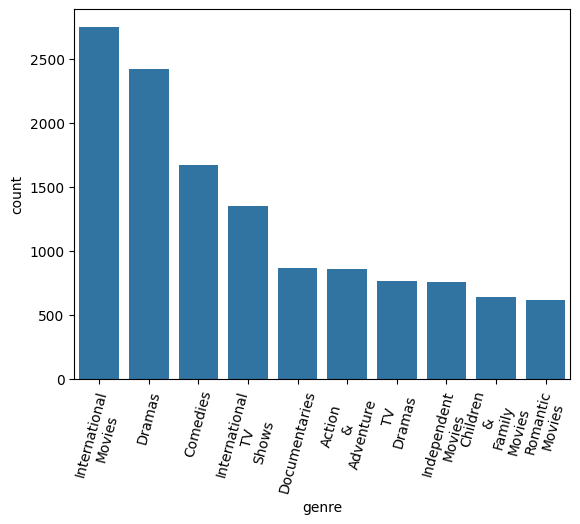

In [18]:
df["genres"]=df["listed_in"].str.split(",")
l=[x.strip() for y in df["genres"] for x in y]
data=pd.Series(l)
top10=data.value_counts().head(10)
df1 = top10.reset_index()
df1.columns=["genre","count"]
df1["genre"]=df1["genre"].str.replace(" ","\n")
sns.barplot(data=df1,x="genre",y="count")
plt.xticks(rotation=75)  # 👈 Rotate x-labels to avoid overlap
    

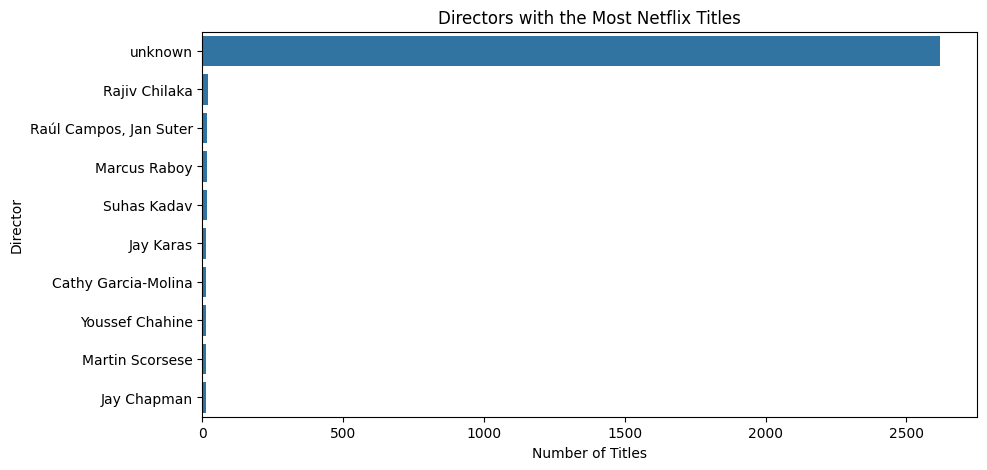

In [19]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Directors with the Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

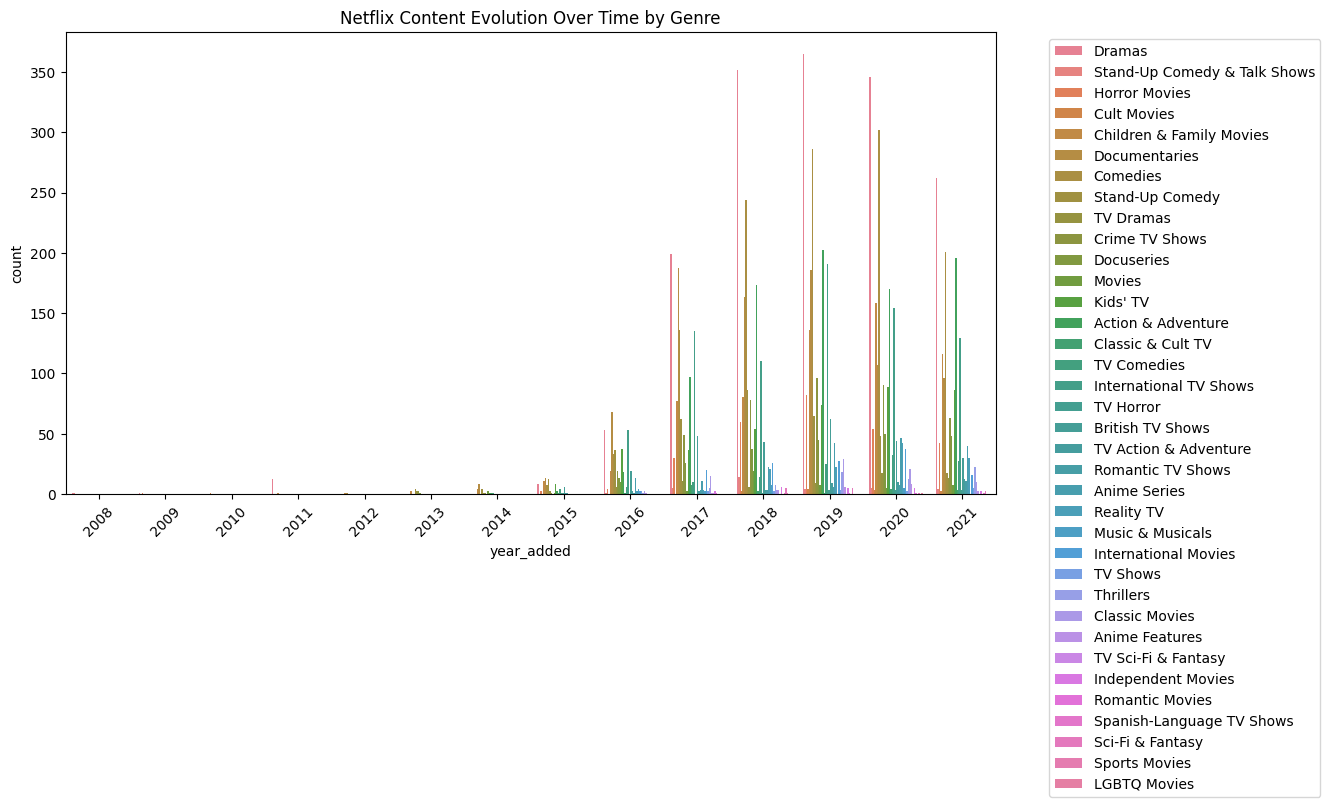

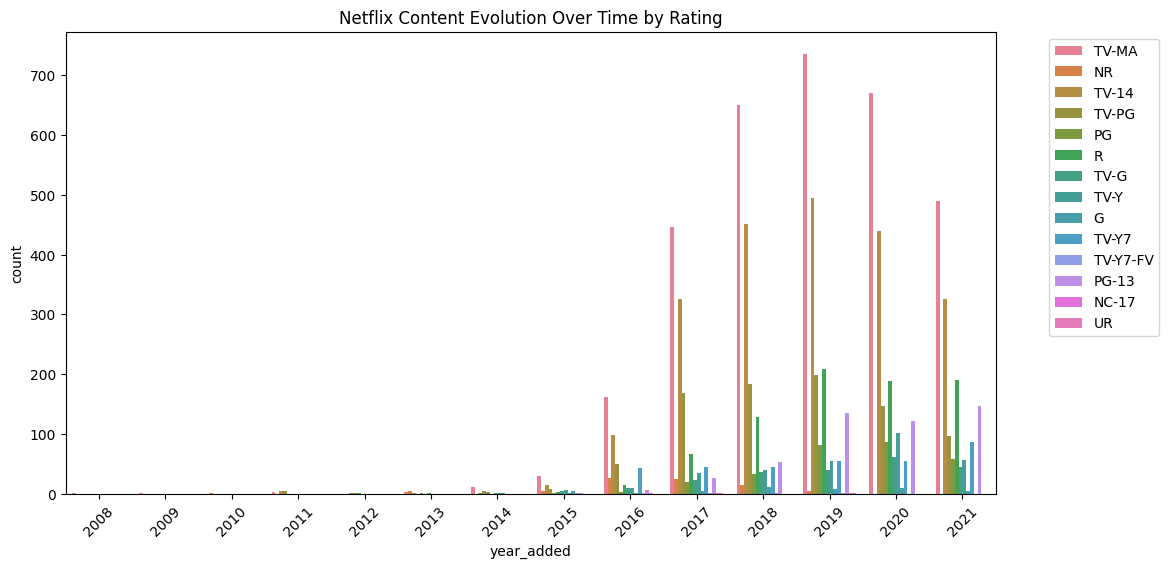

In [20]:
# Assuming genres in 'listed_in' column
df['genre'] = df['listed_in'].str.split(',').str[0]  # Taking first genre

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', hue='genre')
plt.title("Netflix Content Evolution Over Time by Genre")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', hue='rating')
plt.title("Netflix Content Evolution Over Time by Rating")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
